Author: Evan Yip <br>
Purpose: To investigate data quality issues for responses in DOSPERT and Risk questions <br>
Method: Compare the responses of low variance participants to average response values.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##########################################################################################
#######       Set the current working directory to the root of your project     ##########
os.chdir("/Users/evan/Documents/School/MSDS/msds-capstone/vm-spinal-risk/vm-spinal-risk/")
##########################################################################################
sns.set_theme()

In [2]:
df = pd.read_csv('./data/data_raw/RiskFinal_DATA_2024-02-05_0017_combined.csv')

In [3]:
df.filter(regex='exer|work')

,exer_50improv_1drop,exer_50improv_10drop,exer_50improv_50drop,exer_50improv_90drop,exer_90improv_1drop,exer_90improv_10drop,exer_90improv_50drop,exer_90improv_90drop,exer_50pain_1death,exer_50pain_10death,...,work_50improv_90para,work_90improv_1para,work_90improv_10para,work_90improv_50para,work_50improv_1death,work_50improv_10death,work_50improv_50death,work_90improv_1death,work_90improv_10death,work_90improv_50death
0,4,4,3,0,5,5,4,4,4,1,...,0,5,5,0,5,3,0,5,5,0
1,4,4,3,2,5,4,3,3,3,2,...,0,5,3,2,4,2,1,5,3,1
2,3,2,0,0,4,3,0,0,0,0,...,0,2,1,0,1,0,0,1,0,0
3,3,2,1,0,5,4,2,0,1,0,...,0,4,3,0,3,0,0,3,2,0
4,5,4,1,0,5,5,3,0,5,4,...,0,5,4,1,5,4,1,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2,1,0,0,4,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,2,1,0,0,4,3,2,1,3,2,...,0,5,3,2,3,2,0,4,3,0
799,1,1,1,0,3,2,1,1,0,0,...,0,1,1,0,1,0,0,1,0,0
800,4,4,0,0,5,5,3,0,4,0,...,0,5,3,0,3,0,0,4,1,0


In [4]:
risk_df = df.filter(regex='exer|work')
dospert_df = df.filter(regex='dospert')

In [5]:
# Computing the variances
dospert_variance = risk_df.std(axis=1) ** 2 
risk_variance = dospert_df.std(axis=1) ** 2 

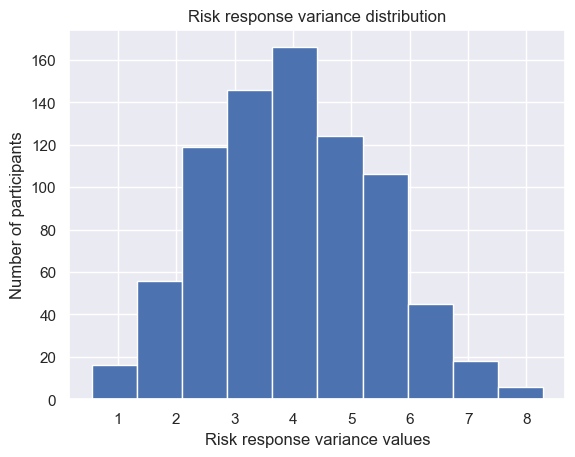

In [6]:
plt.hist(risk_variance)
plt.title('Risk response variance distribution')
plt.xlabel('Risk response variance values')
plt.ylabel('Number of participants')
plt.show()

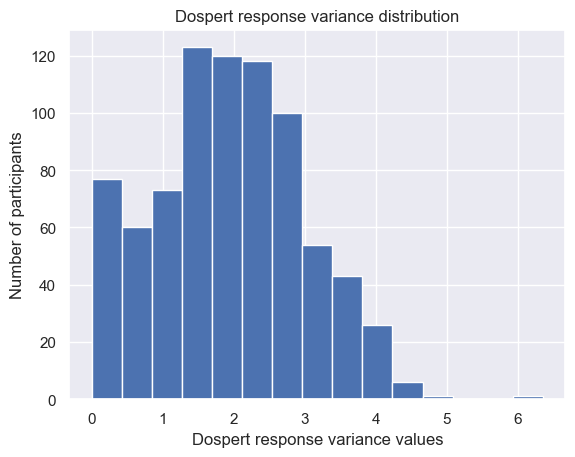

In [7]:
plt.hist(dospert_variance, bins=15)
plt.title('Dospert response variance distribution')
plt.xlabel('Dospert response variance values')
plt.ylabel('Number of participants')
plt.show()

/var/folders/4f/fzllrn4502l9flldxbwxtf9m0000gn/T/ipykernel_95119/2221896639.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


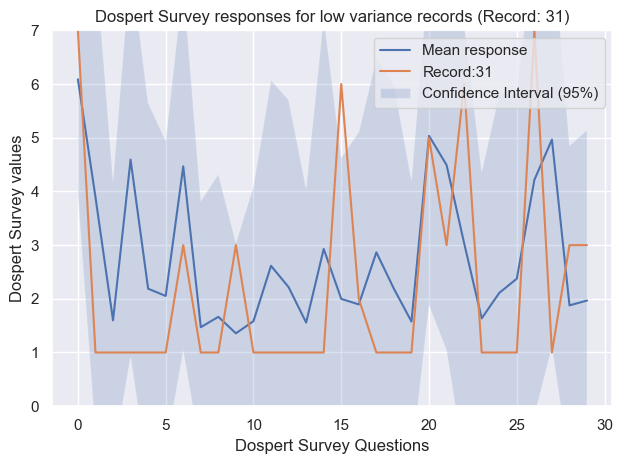

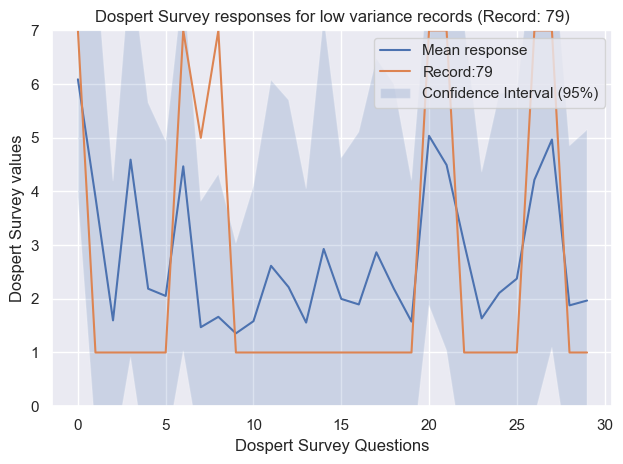

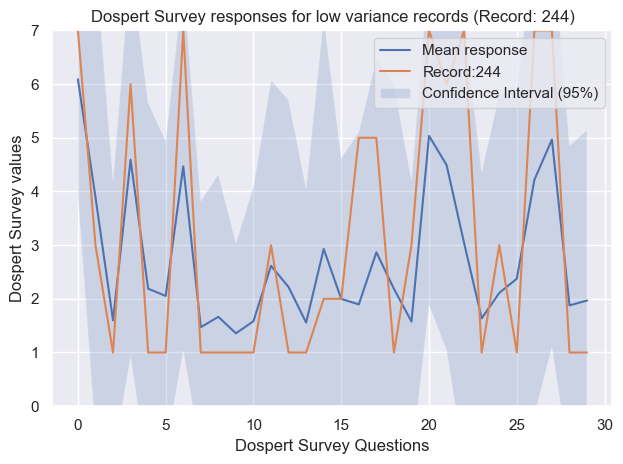

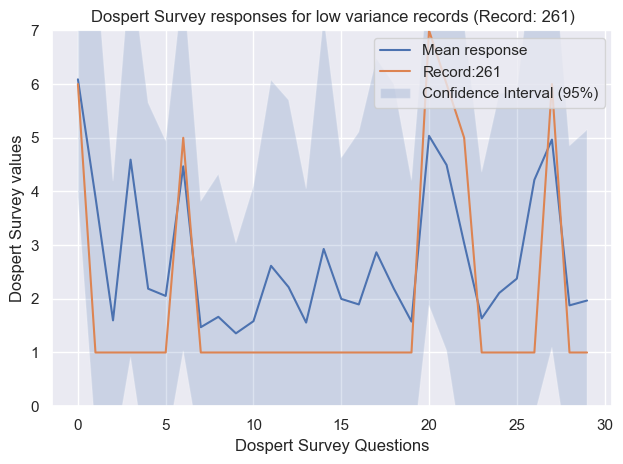

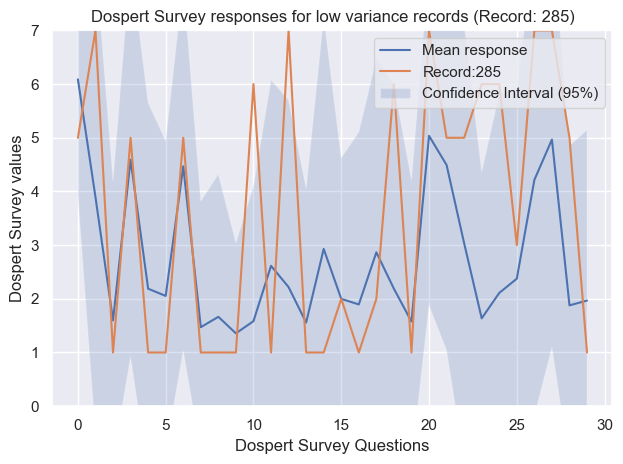

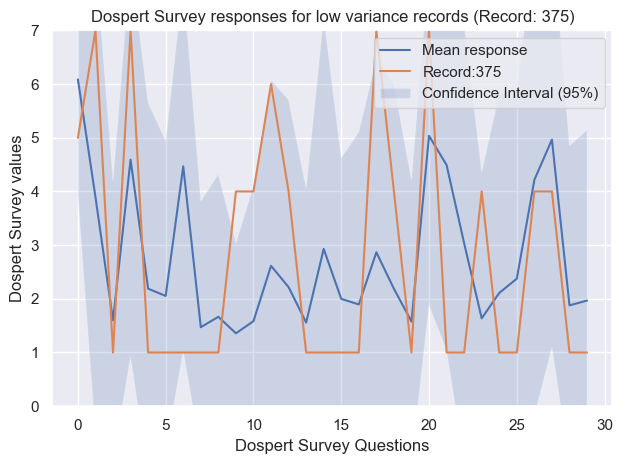

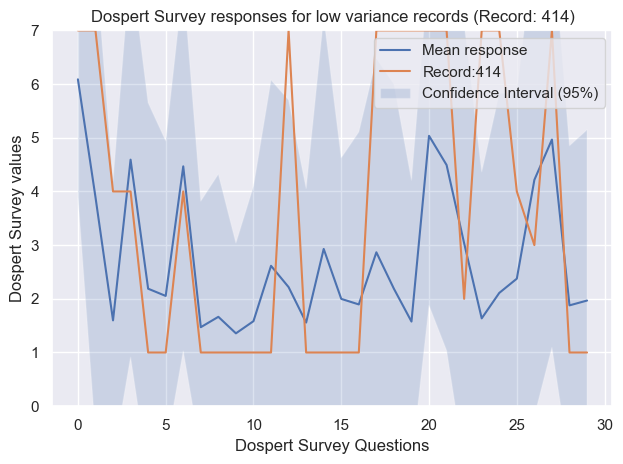

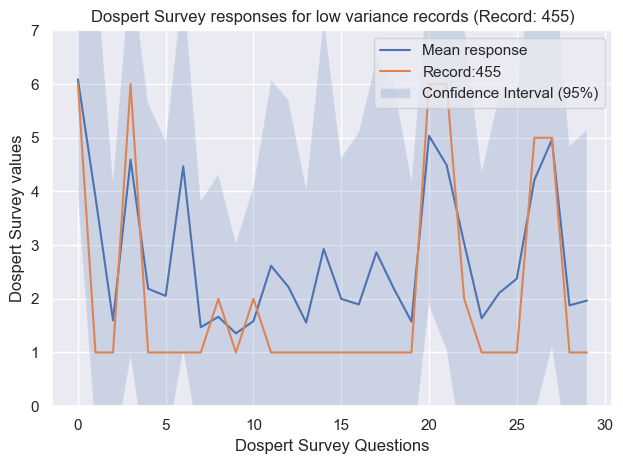

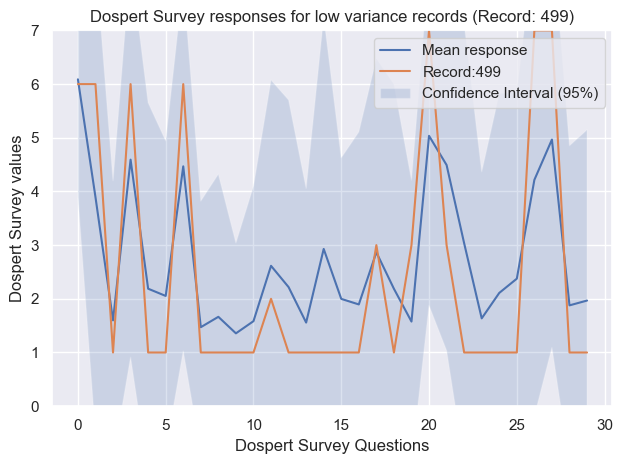

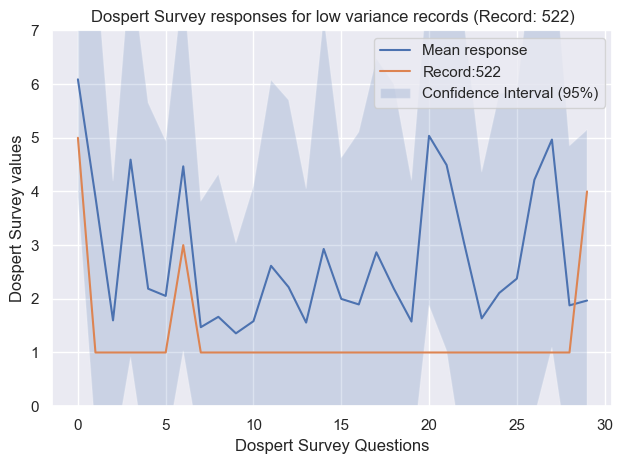

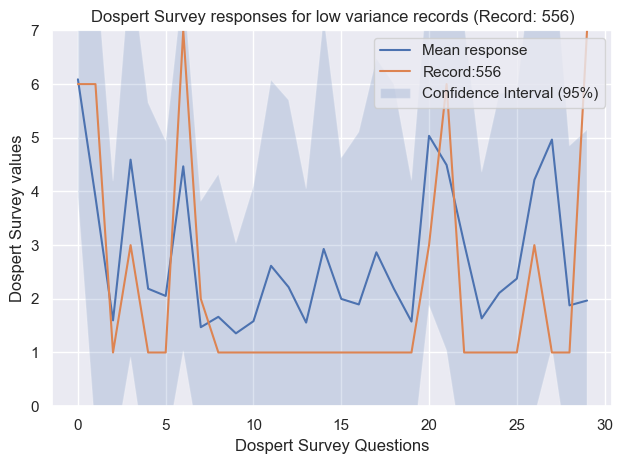

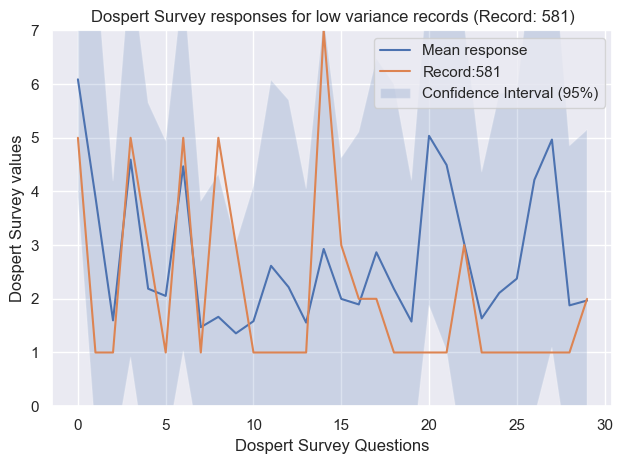

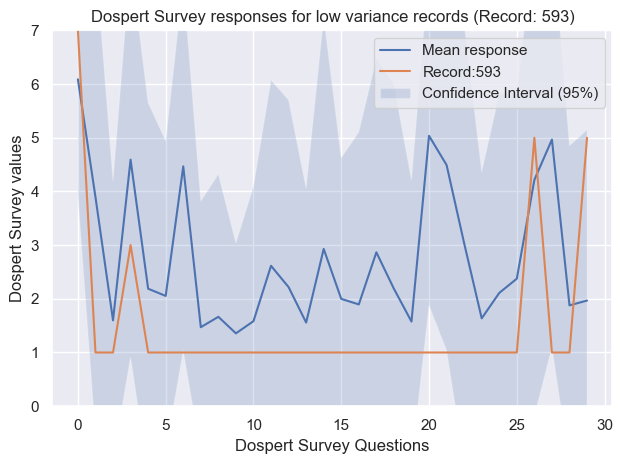

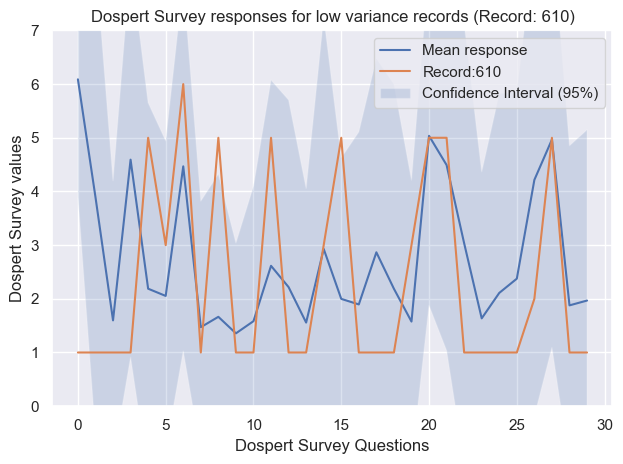

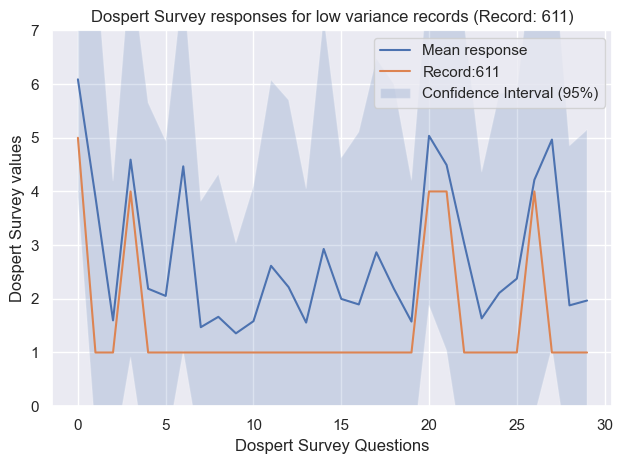

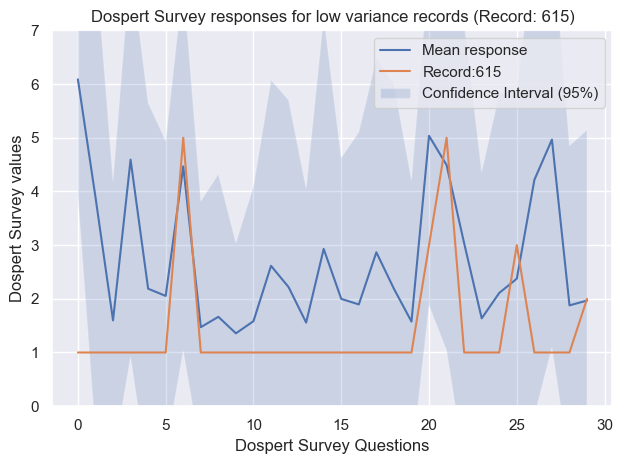

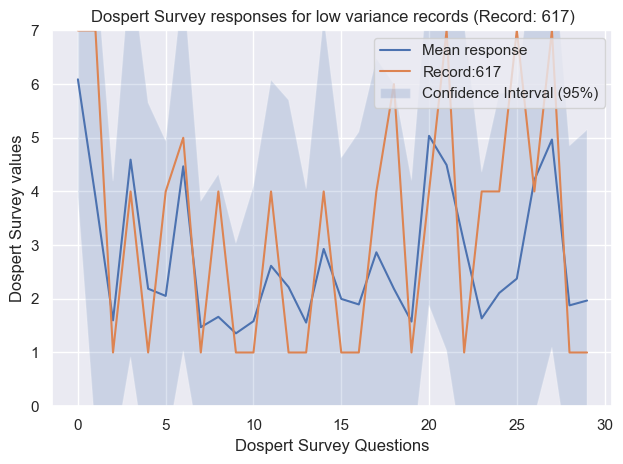

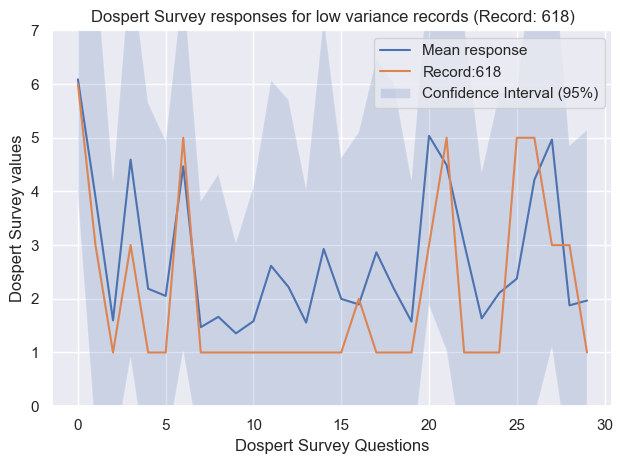

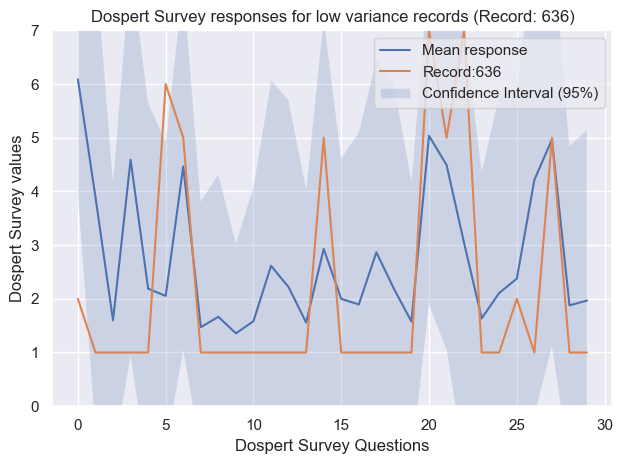

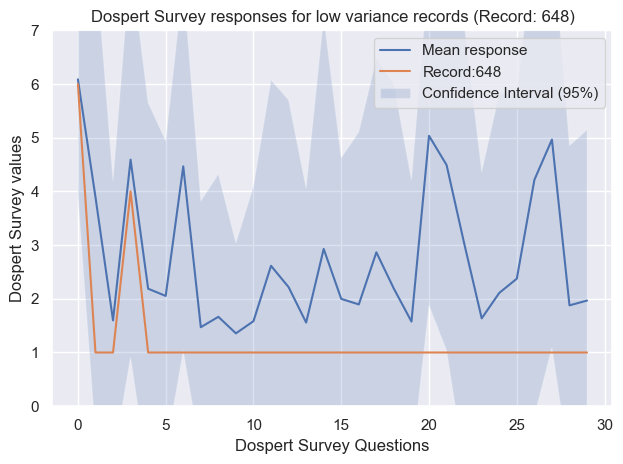

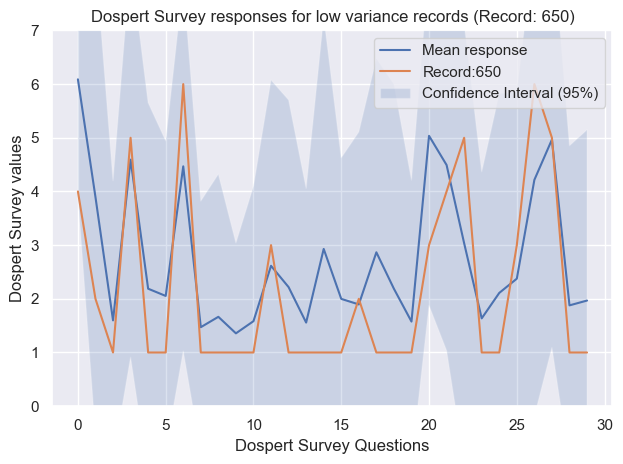

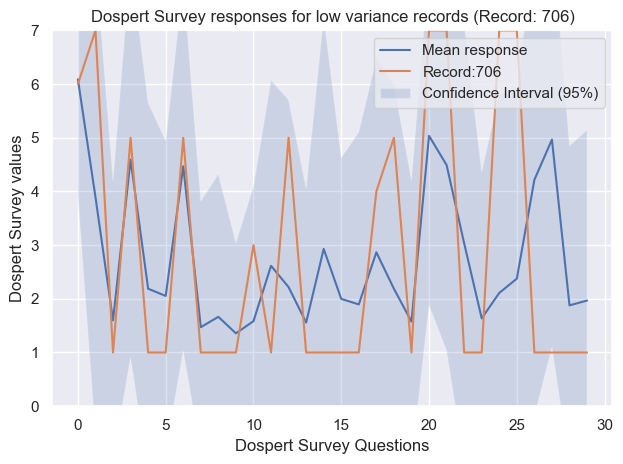

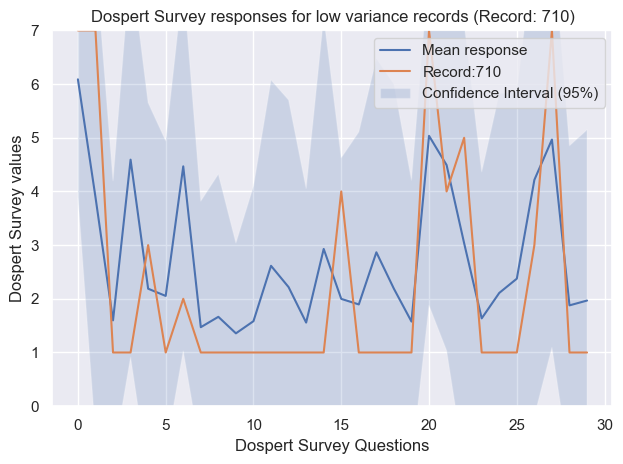

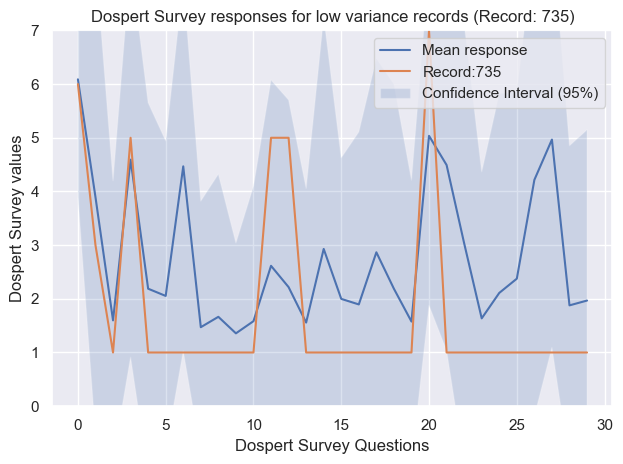

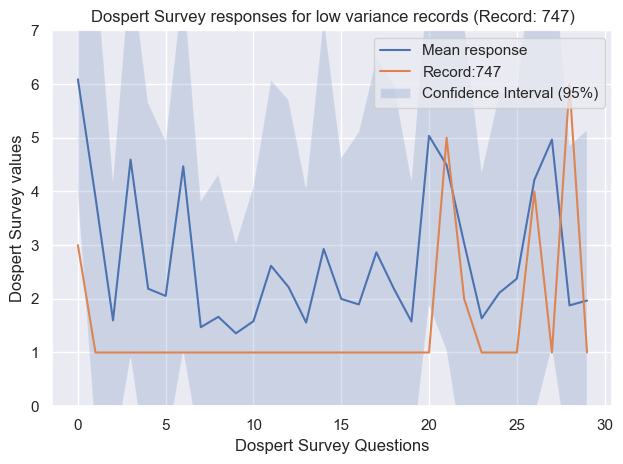

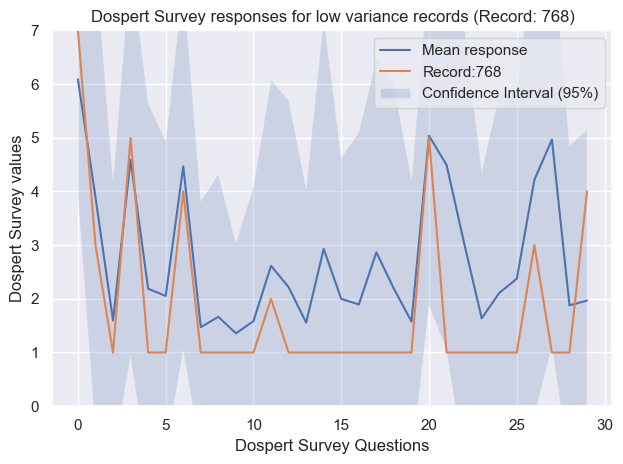

In [16]:
variance_cutoff = 0.02
low_variance_dospert = dospert_df[dospert_variance < variance_cutoff].reset_index()

means = dospert_df.mean().to_numpy()
upper_bounds = means + dospert_df.std(axis=0).to_numpy() * 2
lower_bounds = means - dospert_df.std(axis=0).to_numpy() * 2

agg_df = pd.DataFrame({'means': means, 'upper_bound': upper_bounds, 'lower_bound': lower_bounds})

for record in range(low_variance_dospert.shape[0]):
    plt.figure()
    xvals = np.arange(0, low_variance_dospert.shape[1] - 1, 1)
    record_label = low_variance_dospert.iloc[record, 0]
    plt.plot(agg_df['means'], label='Mean response')
    plt.plot(xvals, low_variance_dospert.iloc[record, 1:], label='Record:' + str(record_label))
    plt.fill_between(xvals, agg_df['lower_bound'], agg_df['upper_bound'], alpha=0.2, label='Confidence Interval (95%)')
    plt.title(f'Dospert Survey responses for low variance records (Record: {record_label})')
    plt.ylim(bottom=0, top=7)
    plt.xlabel('Dospert Survey Questions')
    plt.ylabel('Dospert Survey values')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(f'./figures/low_variance_plots/low_variance_dospert_question_responses_{record}')

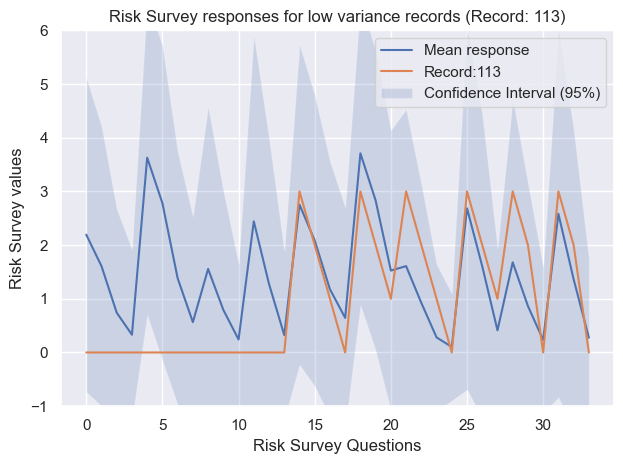

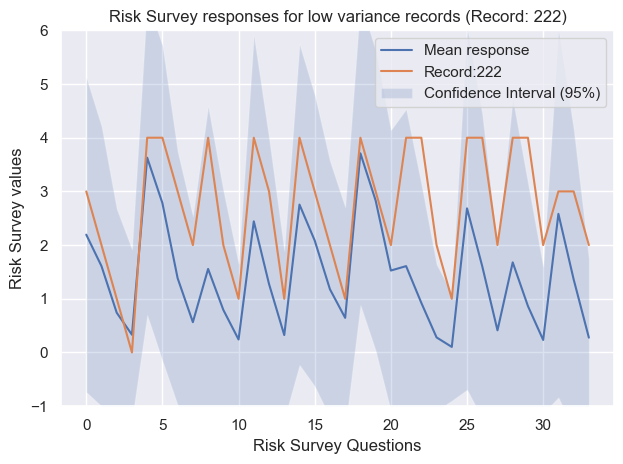

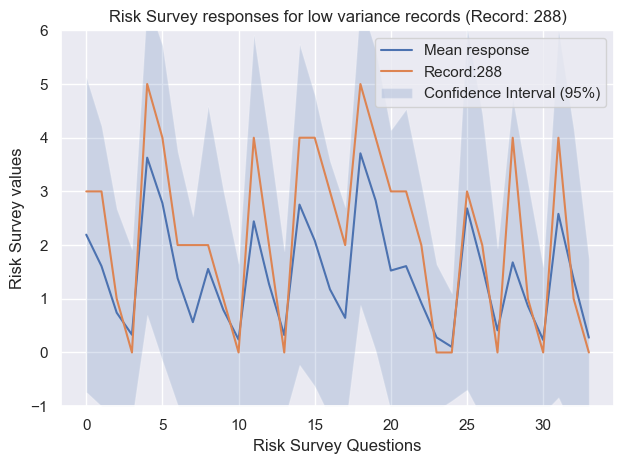

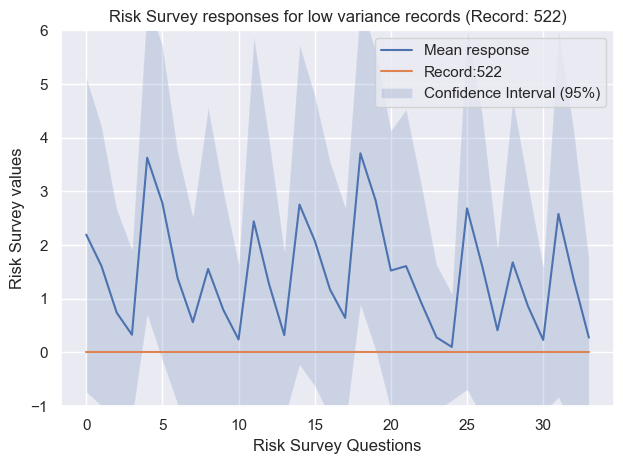

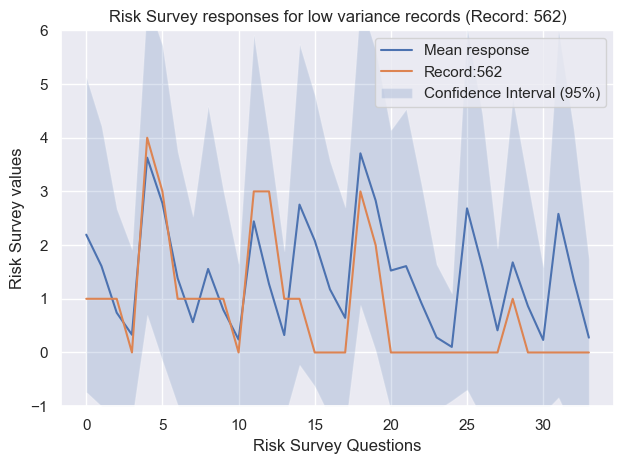

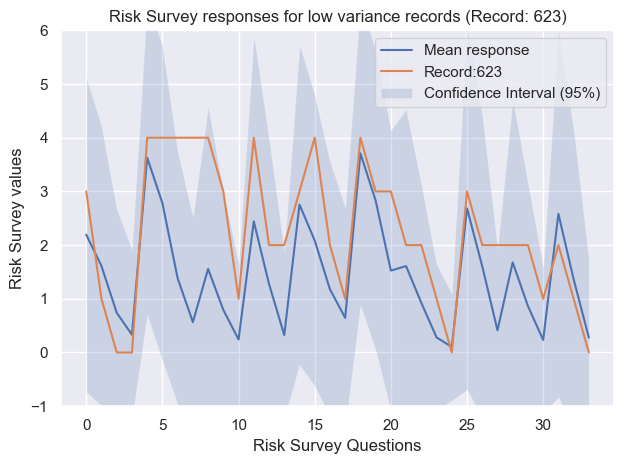

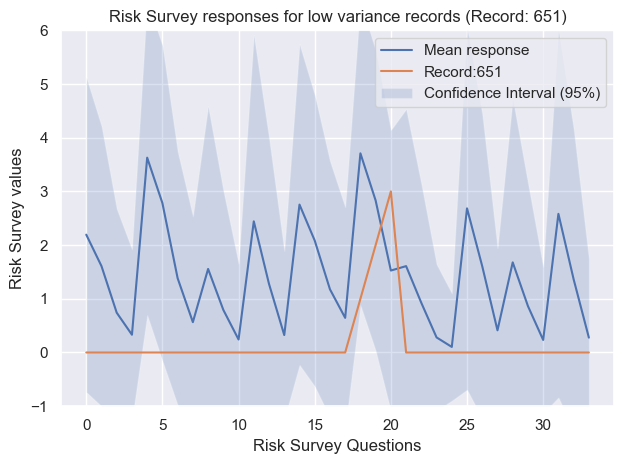

In [17]:
variance_cutoff = 1
low_variance_risk = risk_df[risk_variance < variance_cutoff].reset_index()

means = risk_df.mean().to_numpy()
upper_bounds = means + risk_df.std(axis=0).to_numpy() * 2
lower_bounds = means - risk_df.std(axis=0).to_numpy() * 2

agg_df = pd.DataFrame({'means': means, 'upper_bound': upper_bounds, 'lower_bound': lower_bounds})

for record in range(low_variance_risk.shape[0]):
    plt.figure()
    xvals = np.arange(0, low_variance_risk.shape[1] - 1, 1)
    record_label = low_variance_risk.iloc[record, 0]
    plt.plot(agg_df['means'], label='Mean response')
    plt.plot(xvals, low_variance_risk.iloc[record, 1:], label='Record:' + str(record_label))
    plt.fill_between(xvals, agg_df['lower_bound'], agg_df['upper_bound'], alpha=0.2, label='Confidence Interval (95%)')
    plt.title(f'Risk Survey responses for low variance records (Record: {record_label})')
    plt.ylim(bottom=-1, top=6)
    plt.xlabel('Risk Survey Questions')
    plt.ylabel('Risk Survey values')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(f'./figures/low_variance_plots/low_variance_risk_question_responses_{record}')